In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
sys.path.append("../code/Patchseq-AE-Bioarxiv/")
from refactor.utils.compute import contingency
from refactor.utils.plots import matrix_scatterplot

t_dat = sio.loadmat('/home/rohan/Dropbox/AllenInstitute/CellTypes/dat/raw/M1-Tolias-lab/inh_T.mat',squeeze_me=True)
e_dat = pd.read_csv('/home/rohan/Dropbox/AllenInstitute/CellTypes/dat/raw/M1-Tolias-lab/inh_E_anno.csv', sep=',',index_col=False)

In [2]:
#Potential correspondences between Electrophysiological features across datasets
L = {}
L['AP amplitude (mV)']              = ['short sq. AP1 peak v', 'long sq. AP1 peak v']+ \
                                      ['spc0 spk. peak v', 'spc1 spk. peak v']+ \
                                      ['spc0 first AP v', 'spc1 first AP v', 'spc2 first AP v', 'spc3 first AP v', 'spc4 first AP v']
L['AP amplitude adaptation index']  = ['spc0 spk. peak v', 'spc1 spk. peak v']
L['AP amplitude average adaptation index'] = ['spc0 spk. peak v', 'spc1 spk. peak v']
L['AP threshold (mV)']              = ['long sq. AP1 threshold v','short sq. AP1 thr. v']
L['AP width (ms)']                  = ['short sq. AP1 width', 'long sq. AP1 width']+['spc0 spk. width','spc1 spk. width']
L['Afterdepolarization (mV)']       = ['spc0 first AP v', 'spc1 first AP v', 'spc2 first AP v', 'spc3 first AP v', 'spc4 first AP v', 'spc0 first AP dv', 'spc1 first AP dv', 'spc2 first AP dv', 'spc3 first AP dv', 'spc4 first AP dv', 'spc5 first AP dv'] + ['spc0 ISI shape', 'spc1 ISI shape', 'spc2 ISI shape']
L['Afterhyperpolarization (mV)']    = ['short sq. AP1 fast trough v', 'long sq. AP1 fast trough v'] + \
                                      ['spc0 ISI shape', 'spc1 ISI shape', 'spc2 ISI shape'] + \
                                      ['spc0 spk. fast trough v', 'spc1 spk. fast trough v']
L['ISI Fano factor']                = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.'] + \
                                      ['spc0 inst. freq. norm', 'spc1 inst. freq. norm', 'spc2 inst. freq. norm', 'spc3 inst. freq. norm', 'spc4 inst. freq. norm', 'spc5 inst. freq. norm', 'spc6 inst. freq. norm',]
L['ISI adaptation index']           = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.'] + \
                                      ['spc0 inst. freq. norm', 'spc1 inst. freq. norm', 'spc2 inst. freq. norm', 'spc3 inst. freq. norm', 'spc4 inst. freq. norm', 'spc5 inst. freq. norm', 'spc6 inst. freq. norm']
L['ISI average adaptation index']   = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.'] + \
                                      ['spc0 inst. freq. norm', 'spc1 inst. freq. norm', 'spc2 inst. freq. norm', 'spc3 inst. freq. norm', 'spc4 inst. freq. norm', 'spc5 inst. freq. norm', 'spc6 inst. freq. norm',]
L['ISI coefficient of variation']   = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.'] + \
                                      ['spc0 inst. freq. norm', 'spc1 inst. freq. norm', 'spc2 inst. freq. norm', 'spc3 inst. freq. norm', 'spc4 inst. freq. norm', 'spc5 inst. freq. norm', 'spc6 inst. freq. norm',]
L['Input resistance (MOhm)']        = ['input resistance', 'spc0 step subthr.' ,'spc1 step subthr.']
L['Latency (ms)']                   = ['long sq. latency']
L['Max number of APs']              = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.']
L['Membrane time constant (ms)']    = ['tau'] + ['spc0 subthr. norm', 'spc1 subthr. norm', 'spc2 subthr. norm', 'spc3 subthr. norm']
L['Resting membrane potential (mV)']= ['v baseline', 'spc0 subthr. norm']
L['Rheobase (pA)']                  = ['rheobase i'] + ['input resistance', 'spc0 step subthr.' ,'spc1 step subthr.']
L['Sag area (mV*s)']                = ['spc0 subthr. norm', 'spc1 subthr. norm', 'spc2 subthr. norm', 'spc3 subthr. norm']
L['Sag ratio']                      = ['sag nearest minus 100'] + ['spc0 subthr. norm', 'spc1 subthr. norm', 'spc2 subthr. norm', 'spc3 subthr. norm']
L['Sag time (s)']                   = ['spc0 subthr. norm', 'spc1 subthr. norm', 'spc2 subthr. norm', 'spc3 subthr. norm']
L['Spike frequency adaptation']     = ['spc0 inst. freq.', 'spc1 inst. freq.', 'spc2 inst. freq.', 'spc3 inst. freq.', 'spc4 inst. freq.', 'spc5 inst. freq.'] + ['spc0 inst. freq. norm', 'spc1 inst. freq. norm', 'spc2 inst. freq. norm', 'spc3 inst. freq. norm', 'spc4 inst. freq. norm', 'spc5 inst. freq. norm', 'spc6 inst. freq. norm']
L['Upstroke-to-downstroke ratio']   = ['long sq. AP1 up-down ratio', 'short sq. AP1 up-down ratio'] + \
                                      ['spc0 first AP v', 'spc1 first AP v', 'spc2 first AP v', 'spc3 first AP v', 'spc4 first AP v', 'spc0 first AP dv', 'spc1 first AP dv', 'spc2 first AP dv', 'spc3 first AP dv', 'spc4 first AP dv', 'spc5 first AP dv'] + \
                                      ['spc0 spk. up-down ratio', 'spc1 spk. up-down ratio']


In [ ]:
#Print out all the ephys data:
from IPython.display import display, HTML
for v in e_dat.columns.values:
    print(v)
HTML(e_dat.to_html())

In [3]:
import tensorflow as tf
from refactor.model import Model_TE_aug_decoders
from data_funcs import *
import json
import scipy.io as sio

E_names_file = './refactor/data/proc/E_names.json'
origdata_pth = './refactor/data/proc/PS_v5_beta_0-4_pc_scaled_ipfx_eqTE.mat'

O = sio.loadmat(origdata_pth,squeeze_me=True)
O['E_names']=np.concatenate([O['pc_name'],O['feature_name']],axis = 0)
with open(E_names_file) as f:
    temp = json.load(f)
O['E_names'] = np.array([temp[i] for i in O['E_names']])

XT_orig = O['T_dat']
XE_orig = np.concatenate([O['E_pc_scaled'],O['E_feature']],axis = 1)

#Instance of the model class
model_TE = Model_TE_aug_decoders(T_dim=1252,
                    E_dim=68,
                    T_intermediate_dim=50,
                    E_intermediate_dim=40,
                    latent_dim=3,
                    train_T=False,
                    train_E=False,
                    augment_decoders=False,
                    name='TE')

#Implicit model build
zT, zE, XrT, XrE = model_TE((tf.constant(np.random.rand(1,1252),dtype=tf.float32), tf.constant(np.random.rand(1,68),dtype=tf.float32)), training=False)

#Load weights
model_TE.load_weights('/home/rohan/Remote-AI/dat/result/TE_NM/'
                      'NM_Edat_pcipfx_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_500_ne_1500_cv_1_ri_0_500_ft-weights.h5',by_name=True)

In [4]:
from refactor.utils.tree_helpers import get_merged_ordered_classes
#Get t-types in order as per reference taxonomy:
n_required_classes = np.unique(O['cluster']).size
t_type_labels,t_types = get_merged_ordered_classes(data_labels=O['cluster'].copy(),
                                                   htree_file='./refactor/data/proc/dend_RData_Tree_20181220.csv',
                                                   n_required_classes=n_required_classes)

#well-sampled t-types:
min_sample_thr=10
t_types_well_sampled = []
for t in t_types:
    if np.sum(O['cluster']==t)>min_sample_thr:
        t_types_well_sampled.append(t)

Performed 0 merges. Remaining classes in data = 59


In [ ]:
#For this particular fold, there are ~50 genes that are always zero
import seaborn as sns
sns.set()
#Load summary file from memory for comparison
M = sio.loadmat('/home/rohan/Remote-AI/dat/result/TE_NM/' + \
                'NM_Edat_pcipfx_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_500_ne_1500_cv_1_ri_0_500_ft-summary.mat',squeeze_me=True)

ind = np.argsort((M['XrT']>0.0).sum(axis=0))
plt.plot((M['XrT']>0.0).sum(axis=0)[ind],'b',label='Pred')
plt.plot((O['T_dat']>0.0).sum(axis=0)[ind],'r',label='Data')
ax = plt.gca()
ax.set_xlabel('Sorted genes')
ax.set_ylabel('Cells with non-zero entries')
ax.set_xlim(0,100)
plt.legend()
plt.show()

In [ ]:
#Check which genes are always zero in models trained on different CV folds
D = {}
for cv in np.arange(43):
    M = sio.loadmat(f'/home/rohan/Remote-AI/dat/result/TE_NM/NM_Edat_pcipfx_aT_1-0_aE_1-0_cs_1-0_ad_1_ld_3_bs_200_se_500_ne_1500_cv_{cv:d}_ri_0_500_ft-summary.mat',squeeze_me=True)
    D[cv] = O['gene_id'][M['XrT'].sum(axis=0)==0]
all_zeros = np.concatenate([D[cv] for cv in np.arange(43)])

In [ ]:
#Check how frequently across the models are particular genes all zeros in the predictions
gene,counts = np.unique(all_zeros,return_counts=True)
data_counts = [np.sum(O['T_dat'][:,O['gene_id']==g]>0)/O['T_dat'].shape[0] for g in gene]
dat = list(zip(gene,counts,data_counts))
dat = sorted(dat, key=lambda tup: -tup[1])
for x in dat: print(f'{x[0]:15s}{x[1]:4d}    {x[2]*100:5.2f} %')

In [ ]:
#Check the types to which the individual belong:
z_gene = 'Kcnmb4os2'
ind_nz = O['T_dat'][:,O['gene_id']==z_gene]>0
df = pd.DataFrame({'expression':O['T_dat'][:,O['gene_id']==z_gene][ind_nz],'cluster':O['cluster'][np.flatnonzero(ind_nz)]})
a = df.groupby('cluster').mean()
a.sort_values(by='expression')

In [ ]:
#Batchnorm parameters (and potentially dropout) was on while saving model results. 
#This can lead to model performance appearing worse than it is.
zT_Allen = model_TE.encoder_T(O['T_dat'])
zT_Allen = zT_Allen.numpy()

d = zT_Allen - M['zT']
d = (np.sum(d**2,axis=1))**0.5
d = d/np.max(d)
c = np.concatenate([np.zeros_like(zT_Allen),d.reshape(d.size,1)],axis=1)

from matplotlib import collections  as mc
sns.set()

fig, ax = plt.subplots(figsize=(4,4))
lines = list(zip(zT_Allen[:,0:-1],M['zT'][:,0:-1]))
lc = mc.LineCollection(lines, colors=c, linewidths=1)
plt.scatter(zT_Allen[:,0],zT_Allen[:,1],c='r',s=5,alpha=0.5)
plt.scatter(M['zT'][:,0],M['zT'][:,1],c='b',s=5,alpha=0.5)
ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.1)
#ax=plt.gca()
ax.set_xlim(-2,3)
ax.set_ylim(-3,2)
#Small differences here - not consequential to overall analysis. 

In [5]:
#Predict embedding:
zT_Tolias = model_TE.encoder_T(tf.constant(t_dat['log1p'],dtype=tf.float32),training=False)
zT_Tolias = zT_Tolias.numpy()

#Predict Ephys data
XrE_Tolias = model_TE.decoder_E(tf.constant(zT_Tolias,dtype=tf.float32),training=False)
XrE_Tolias = XrE_Tolias.numpy()

#Obtain latent representation for our cells to train classifier
zT_Allen = model_TE.encoder_T(O['T_dat'])
zT_Allen = zT_Allen.numpy()

(AP amplitude (mV),short sq. AP1 peak v Pearson r = 0.30) ======== 
(AP amplitude (mV),long sq. AP1 peak v Pearson r = 0.49) ======== 


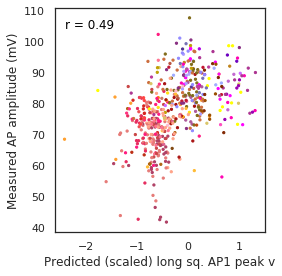

(AP amplitude (mV),spc0 spk. peak v Pearson r = 0.31) ======== 
(AP amplitude (mV),spc1 spk. peak v Pearson r = 0.60) ======== 


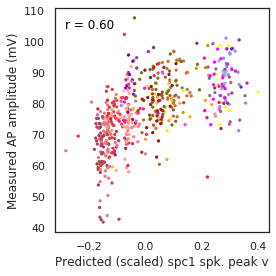

(AP amplitude (mV),spc0 first AP v Pearson r = 0.42) ======== 


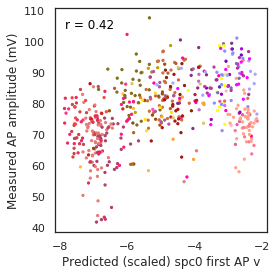

(AP amplitude (mV),spc1 first AP v Pearson r = -0.47) ======== 
(AP amplitude (mV),spc2 first AP v Pearson r = 0.24) ======== 
(AP amplitude (mV),spc3 first AP v Pearson r = 0.31) ======== 
(AP amplitude (mV),spc4 first AP v Pearson r = 0.13) ======== 
(AP amplitude adaptation index,spc0 spk. peak v Pearson r = -0.19) ======== 
(AP amplitude adaptation index,spc1 spk. peak v Pearson r = -0.57) ======== 
(AP amplitude average adaptation index,spc0 spk. peak v Pearson r = 0.03) ======== 
(AP amplitude average adaptation index,spc1 spk. peak v Pearson r = -0.39) ======== 
(AP threshold (mV),long sq. AP1 threshold v Pearson r = 0.24) ======== 
(AP threshold (mV),short sq. AP1 thr. v Pearson r = 0.26) ======== 
(AP width (ms),short sq. AP1 width Pearson r = 0.81) ======== 


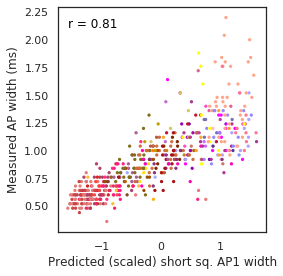

(AP width (ms),long sq. AP1 width Pearson r = 0.81) ======== 


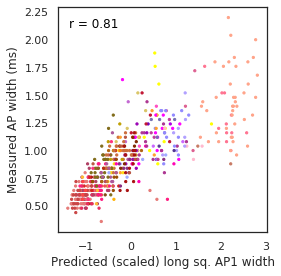

(AP width (ms),spc0 spk. width Pearson r = -0.81) ======== 
(AP width (ms),spc1 spk. width Pearson r = -0.19) ======== 
(Afterdepolarization (mV),spc0 first AP v Pearson r = 0.12) ======== 
(Afterdepolarization (mV),spc1 first AP v Pearson r = -0.14) ======== 
(Afterdepolarization (mV),spc2 first AP v Pearson r = 0.09) ======== 
(Afterdepolarization (mV),spc3 first AP v Pearson r = 0.11) ======== 
(Afterdepolarization (mV),spc4 first AP v Pearson r = -0.10) ======== 
(Afterdepolarization (mV),spc0 first AP dv Pearson r = -0.13) ======== 
(Afterdepolarization (mV),spc1 first AP dv Pearson r = -0.15) ======== 
(Afterdepolarization (mV),spc2 first AP dv Pearson r = 0.16) ======== 
(Afterdepolarization (mV),spc3 first AP dv Pearson r = 0.12) ======== 
(Afterdepolarization (mV),spc4 first AP dv Pearson r = -0.13) ======== 
(Afterdepolarization (mV),spc5 first AP dv Pearson r = 0.13) ======== 
(Afterdepolarization (mV),spc0 ISI shape Pearson r = 0.24) ======== 
(Afterdepolarization (mV),spc1

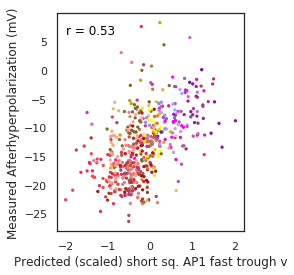

(Afterhyperpolarization (mV),long sq. AP1 fast trough v Pearson r = 0.48) ======== 


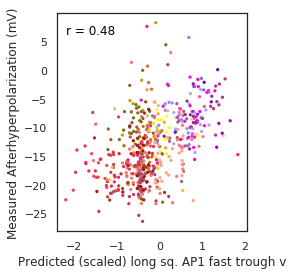

(Afterhyperpolarization (mV),spc0 ISI shape Pearson r = 0.68) ======== 


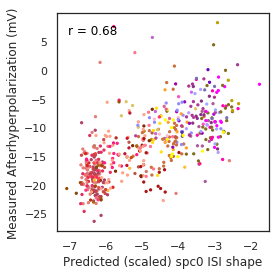

(Afterhyperpolarization (mV),spc1 ISI shape Pearson r = -0.50) ======== 
(Afterhyperpolarization (mV),spc2 ISI shape Pearson r = 0.29) ======== 
(Afterhyperpolarization (mV),spc0 spk. fast trough v Pearson r = 0.54) ======== 


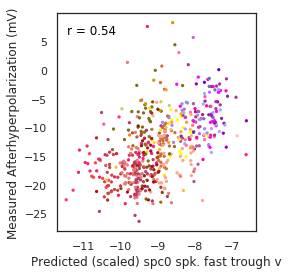

(Afterhyperpolarization (mV),spc1 spk. fast trough v Pearson r = 0.40) ======== 


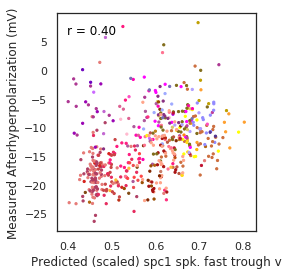

(ISI Fano factor,spc0 inst. freq. Pearson r = -0.18) ======== 
(ISI Fano factor,spc1 inst. freq. Pearson r = -0.09) ======== 
(ISI Fano factor,spc2 inst. freq. Pearson r = -0.11) ======== 
(ISI Fano factor,spc3 inst. freq. Pearson r = 0.04) ======== 
(ISI Fano factor,spc4 inst. freq. Pearson r = -0.17) ======== 
(ISI Fano factor,spc5 inst. freq. Pearson r = 0.16) ======== 
(ISI Fano factor,spc0 inst. freq. norm Pearson r = -0.13) ======== 
(ISI Fano factor,spc1 inst. freq. norm Pearson r = -0.19) ======== 
(ISI Fano factor,spc2 inst. freq. norm Pearson r = -0.10) ======== 
(ISI Fano factor,spc3 inst. freq. norm Pearson r = -0.03) ======== 
(ISI Fano factor,spc4 inst. freq. norm Pearson r = -0.19) ======== 
(ISI Fano factor,spc5 inst. freq. norm Pearson r = 0.08) ======== 
(ISI Fano factor,spc6 inst. freq. norm Pearson r = -0.02) ======== 
(ISI adaptation index,spc0 inst. freq. Pearson r = -0.25) ======== 
(ISI adaptation index,spc1 inst. freq. Pearson r = -0.12) ======== 
(ISI adaptati

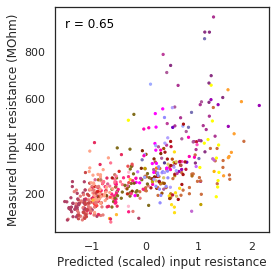

(Input resistance (MOhm),spc0 step subthr. Pearson r = 0.45) ======== 


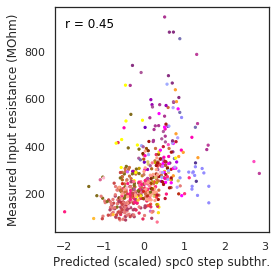

(Input resistance (MOhm),spc1 step subthr. Pearson r = 0.65) ======== 


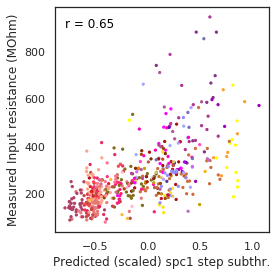

(Latency (ms),long sq. latency Pearson r = 0.24) ======== 
(Max number of APs,spc0 inst. freq. Pearson r = 0.72) ======== 


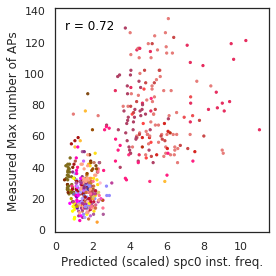

(Max number of APs,spc1 inst. freq. Pearson r = 0.14) ======== 
(Max number of APs,spc2 inst. freq. Pearson r = 0.42) ======== 


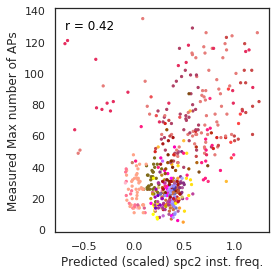

(Max number of APs,spc3 inst. freq. Pearson r = 0.20) ======== 
(Max number of APs,spc4 inst. freq. Pearson r = 0.60) ======== 


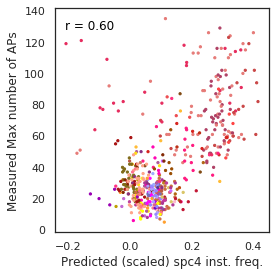

(Max number of APs,spc5 inst. freq. Pearson r = -0.35) ======== 
(Membrane time constant (ms),tau Pearson r = 0.72) ======== 


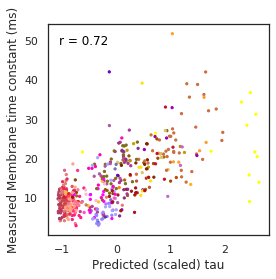

(Membrane time constant (ms),spc0 subthr. norm Pearson r = 0.40) ======== 
(Membrane time constant (ms),spc1 subthr. norm Pearson r = 0.70) ======== 


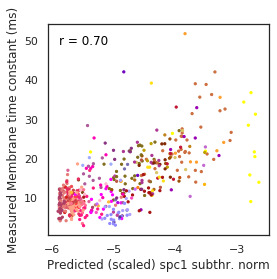

(Membrane time constant (ms),spc2 subthr. norm Pearson r = 0.40) ======== 
(Membrane time constant (ms),spc3 subthr. norm Pearson r = 0.14) ======== 
(Resting membrane potential (mV),v baseline Pearson r = 0.29) ======== 
(Resting membrane potential (mV),spc0 subthr. norm Pearson r = 0.31) ======== 
(Rheobase (pA),rheobase i Pearson r = 0.67) ======== 


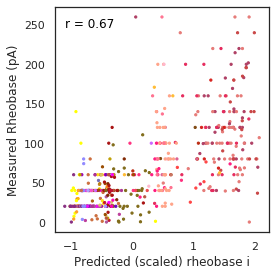

(Rheobase (pA),input resistance Pearson r = -0.61) ======== 
(Rheobase (pA),spc0 step subthr. Pearson r = -0.41) ======== 
(Rheobase (pA),spc1 step subthr. Pearson r = -0.59) ======== 
(Sag area (mV*s),spc0 subthr. norm Pearson r = 0.46) ======== 


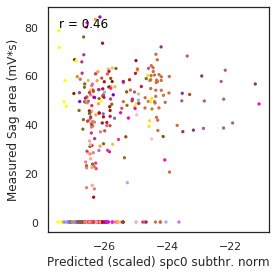

(Sag area (mV*s),spc1 subthr. norm Pearson r = 0.54) ======== 


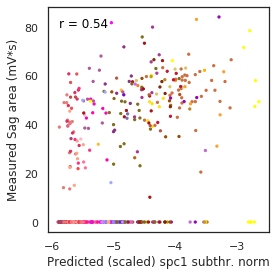

(Sag area (mV*s),spc2 subthr. norm Pearson r = 0.42) ======== 


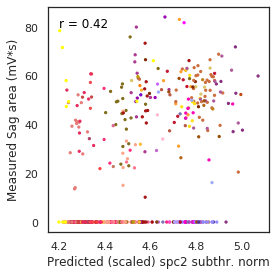

(Sag area (mV*s),spc3 subthr. norm Pearson r = 0.01) ======== 
(Sag ratio,sag nearest minus 100 Pearson r = 0.56) ======== 


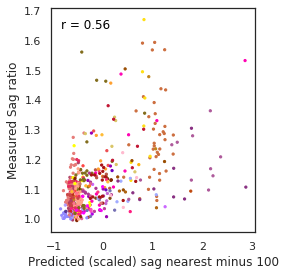

(Sag ratio,spc0 subthr. norm Pearson r = 0.53) ======== 


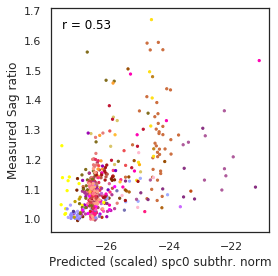

(Sag ratio,spc1 subthr. norm Pearson r = 0.37) ======== 
(Sag ratio,spc2 subthr. norm Pearson r = 0.33) ======== 
(Sag ratio,spc3 subthr. norm Pearson r = 0.16) ======== 
(Sag time (s),spc0 subthr. norm Pearson r = 0.49) ======== 


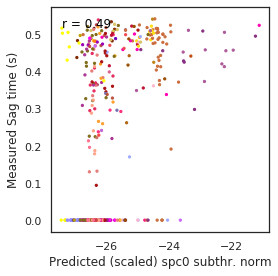

(Sag time (s),spc1 subthr. norm Pearson r = 0.50) ======== 


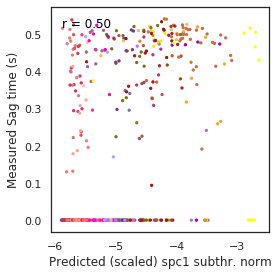

(Sag time (s),spc2 subthr. norm Pearson r = 0.42) ======== 


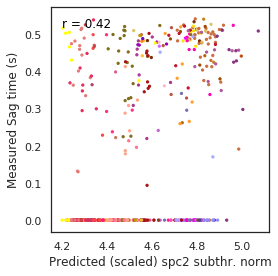

(Sag time (s),spc3 subthr. norm Pearson r = 0.03) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc0 inst. freq. Pearson r = 0.39) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc1 inst. freq. Pearson r = 0.25) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc2 inst. freq. Pearson r = 0.16) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc3 inst. freq. Pearson r = -0.02) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc4 inst. freq. Pearson r = 0.33) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc5 inst. freq. Pearson r = -0.37) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc0 inst. freq. norm Pearson r = 0.39) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc1 inst. freq. norm Pearson r = 0.30) ======== 
1 nans in measured
0 nans in pred
(Spike frequency adaptation,spc2 inst.

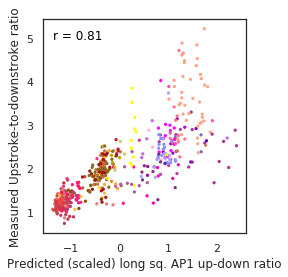

(Upstroke-to-downstroke ratio,short sq. AP1 up-down ratio Pearson r = 0.65) ======== 


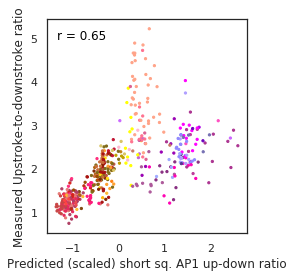

(Upstroke-to-downstroke ratio,spc0 first AP v Pearson r = 0.81) ======== 


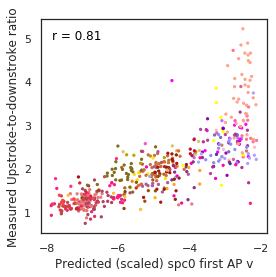

(Upstroke-to-downstroke ratio,spc1 first AP v Pearson r = -0.19) ======== 
(Upstroke-to-downstroke ratio,spc2 first AP v Pearson r = -0.31) ======== 
(Upstroke-to-downstroke ratio,spc3 first AP v Pearson r = -0.38) ======== 
(Upstroke-to-downstroke ratio,spc4 first AP v Pearson r = -0.00) ======== 
(Upstroke-to-downstroke ratio,spc0 first AP dv Pearson r = -0.74) ======== 
(Upstroke-to-downstroke ratio,spc1 first AP dv Pearson r = 0.24) ======== 
(Upstroke-to-downstroke ratio,spc2 first AP dv Pearson r = 0.48) ======== 


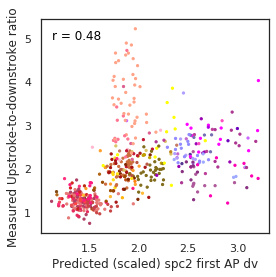

(Upstroke-to-downstroke ratio,spc3 first AP dv Pearson r = -0.38) ======== 
(Upstroke-to-downstroke ratio,spc4 first AP dv Pearson r = -0.45) ======== 
(Upstroke-to-downstroke ratio,spc5 first AP dv Pearson r = -0.25) ======== 
(Upstroke-to-downstroke ratio,spc0 spk. up-down ratio Pearson r = 0.79) ======== 


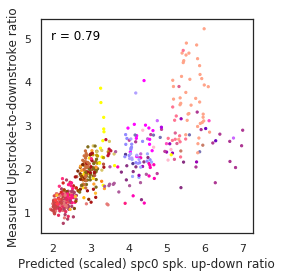

(Upstroke-to-downstroke ratio,spc1 spk. up-down ratio Pearson r = 0.33) ======== 


In [6]:
cc_thr = 0.4
figure_path = '/home/rohan/Dropbox/AllenInstitute/CellTypes/doc/Patchseq_NM_2020/'
keep_tol_cells = np.logical_and(np.isin(e_dat['cluster'].values,t_types_well_sampled),e_dat['cluster_conf'].values>80)

for key_tol in L.keys():
    for key_allen in L[key_tol]:
        ind = np.flatnonzero(O['E_names']==key_allen)[0]
        pred_ = XrE_Tolias[:,ind]
        measured_ = e_dat[key_tol].values

        
        pred_ = pred_[keep_tol_cells].copy()
        measured_ = measured_[keep_tol_cells].copy()
        colors = e_dat['cluster_color'].values[keep_tol_cells].copy()
        
        cij = np.corrcoef(pred_,measured_)
        if np.isnan(cij[0,1]):
            print(f'{np.sum(np.isnan(measured_))} nans in measured')
            print(f'{np.sum(np.isnan(pred_))} nans in pred')
            measured_[np.isnan(measured_)] = 0
            cij = np.corrcoef(pred_,measured_)

        print(f'({key_tol},{key_allen} Pearson r = {cij[0,1]:0.2f}) ======== ')
        if cij[0,1]>cc_thr:
            plt.figure(figsize=(4,4))
            plt.scatter(pred_, measured_, c=colors ,s=5)
            ax = plt.gca()
            ax.set_xlabel(f'Predicted (scaled) {key_allen}')
            ax.set_ylabel(f'Measured {key_tol}')
            ax.text(0.05, 0.95, s=f'r = {cij[0,1]:0.2f}',
                    verticalalignment='top', horizontalalignment='left',
                    transform=ax.transAxes,
                    color='black', fontsize=12)
            plt.tight_layout()
            plt.savefig(figure_path + f'Tolias_2020/{key_tol} - {key_allen} - {cij[0,1]:0.2f}.png',dpi=300)
            plt.show()



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# neigh = KNeighborsClassifier(n_neighbors=8)
# neigh.fit(zT_Allen, O['cluster'])
# pred_lbl = neigh.predict(zT_Tolias)

keep_allen_cells = np.isin(O['cluster'],t_types_well_sampled)
train_lbl = O['cluster'][keep_allen_cells]
z_train = zT_Allen[keep_allen_cells,:]

qda = QDA(reg_param=1e-3,store_covariance=True,tol=1e-6)
qda.fit(z_train, train_lbl)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.001,
                              store_covariance=True, tol=1e-06)

In [12]:
pred_lbl = qda.predict(zT_Tolias)
true_lbl = e_dat['cluster'].fillna('Unknown').values
pred_lbl[pred_lbl=='Sst Crh 4930553C11Rik ']='Sst Crh 4930553C11Rik'

In [13]:
true_lbl = true_lbl[keep_tol_cells]
pred_lbl = pred_lbl[keep_tol_cells]

524 cells belong to GABAergic classes in the dataset
346.0 true positives with QDA classifier, accuracy = 0.66


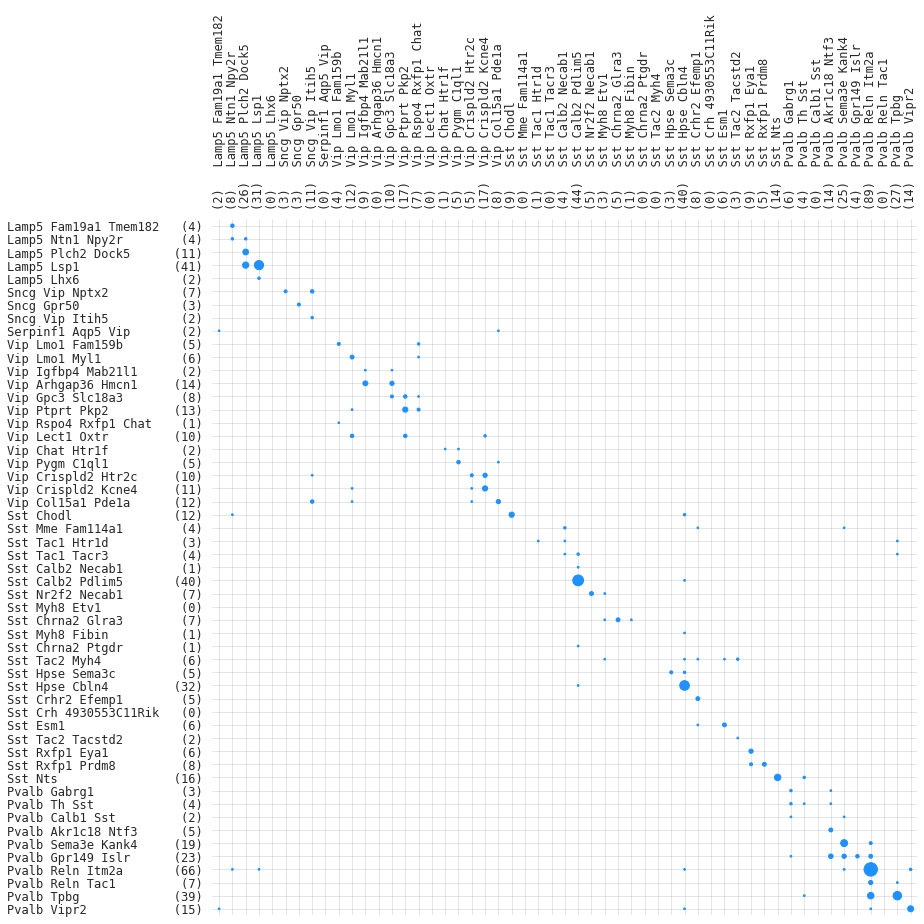

In [14]:
C = contingency(a = true_lbl,
            b = pred_lbl,
            unique_a=t_types_well_sampled,
            unique_b=t_types_well_sampled)

xname = t_types_well_sampled.copy()
xdata = [f'({np.sum(pred_lbl==n):d})' for n in t_types_well_sampled]
xlabelc = [f'{b:<6s}'+ f'{a:s}' for (a,b) in zip(xname,xdata)]

yname = t_types_well_sampled.copy()
ydata = [f'({np.sum(true_lbl==n):d})' for n in t_types_well_sampled]
ylabelc = [f'{a:22s}'+f'{b:>5s}' for (a,b) in zip(yname,ydata)]

matrix_scatterplot(C,
                    xticklabels=xlabelc,
                    yticklabels=ylabelc,
                    xlabel='',
                    ylabel='',
                    mc='dodgerblue',
                    fig_width=13,
                    fig_height=13,
                    scale_factor=3.0)

plt.savefig(figure_path+'t-type-pred-contingency.png',dpi=300)

print(f'{true_lbl.shape[0]} cells belong to GABAergic classes in the dataset')
print(f'{np.sum(np.diag(C))} true positives with QDA classifier, accuracy = {np.sum(np.diag(C))/true_lbl.shape[0]:0.2f}')